In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
import statsmodels.stats.api as sapi
import matplotlib.dates as mdates

Помочь ювелирному магазину сделать удобный сервис по подбору колец.

In [13]:
df = pd.read_csv('jewelry_store_data.csv')
df.rename(columns={'cnt(addToCart)': 'cart', 'sum(addToCartItems)': 'cart_items'}, inplace=True)
df['date'] = pd.to_datetime(df.date)
df.head()

,date,Variant,cart,cart_items
0,2019-09-01,90,56,110247
1,2019-09-01,10,52,163098
2,2019-09-02,10,59,93317
3,2019-09-02,90,56,26457
4,2019-09-03,90,54,56418


In [14]:
df.dtypes

date          datetime64[ns]
Variant                int64
cart                   int64
cart_items             int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        50 non-null     datetime64[ns]
 1   Variant     50 non-null     int64         
 2   cart        50 non-null     int64         
 3   cart_items  50 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 KB


In [16]:
df.describe()

,date,Variant,cart,cart_items
count,50,50.000000,50.000000,50.00000
mean,2019-09-13 00:00:00,50.000000,47.500000,39477.50000
min,2019-09-01 00:00:00,10.000000,12.000000,5191.00000
25%,2019-09-07 00:00:00,10.000000,36.500000,16525.25000
50%,2019-09-13 00:00:00,50.000000,46.000000,27138.00000
75%,2019-09-19 00:00:00,90.000000,54.000000,38011.25000
max,2019-09-25 00:00:00,90.000000,156.000000,286956.00000
std,NaN,40.406102,22.252952,46676.81641


In [17]:
df_cum = df.set_index(['Variant', 'date']).groupby('Variant').cumsum()
df_cum.head()

cart  cart_items
Variant date                        
90      2019-09-01    56      110247
10      2019-09-01    52      163098
        2019-09-02   111      256415
90      2019-09-02   112      136704
        2019-09-03   166      193122

In [18]:
df_cum['conversion'] = df_cum.cart / df_cum.cart_items
df_cum.head()

cart  cart_items  conversion
Variant date                                    
90      2019-09-01    56      110247    0.000508
10      2019-09-01    52      163098    0.000319
        2019-09-02   111      256415    0.000433
90      2019-09-02   112      136704    0.000819
        2019-09-03   166      193122    0.000860

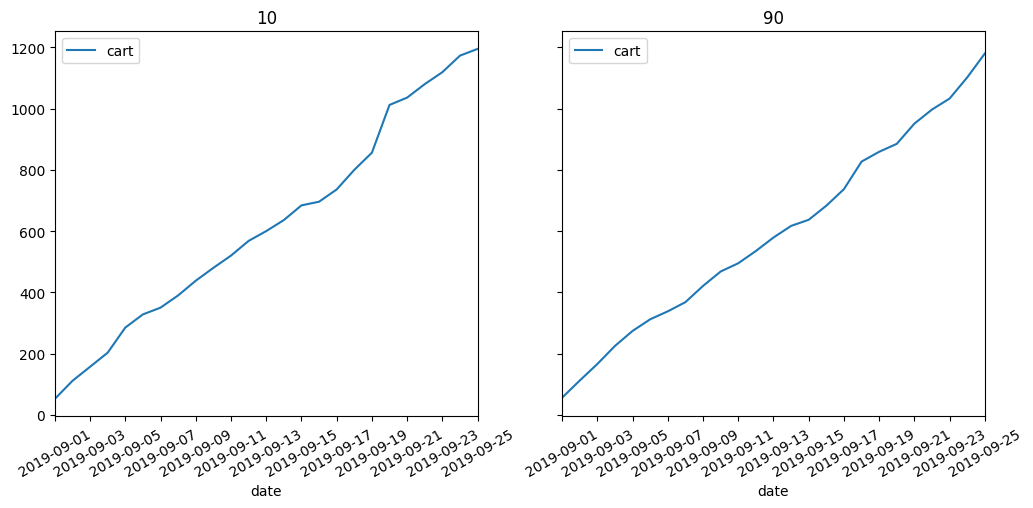

In [21]:
_, ax = plt.subplots(1, 2, figsize = (12,5), sharey=True)
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
ax = ax.flat
for i, (name, group) in enumerate(df_cum.groupby('Variant')[['cart']]):
    group.reset_index(0, drop=True).plot(ax=ax[i])
    ax[i].xaxis.set_major_formatter(myFmt_major)
    ax[i].xaxis.set_minor_formatter(myFmt_minor)
    ax[i].xaxis.set_minor_locator(myLoc)
    ax[i].xaxis.set_major_locator(myLoc)
    ax[i].set(ylabel = None
       , title = name
       , label=None)
    ax[i].tick_params(axis="x", which="both", rotation=30)

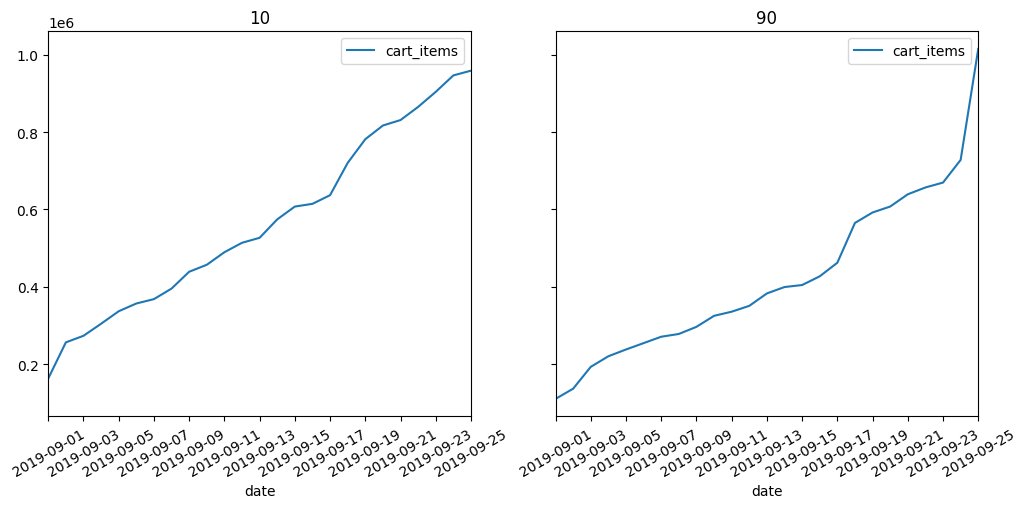

In [22]:
_, ax = plt.subplots(1, 2, figsize = (12,5), sharey=True)
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
ax = ax.flat
for i, (name, group) in enumerate(df_cum.groupby('Variant')[['cart_items']]):
    group.reset_index(0, drop=True).plot(ax=ax[i])
    ax[i].xaxis.set_major_formatter(myFmt_major)
    ax[i].xaxis.set_minor_formatter(myFmt_minor)
    ax[i].xaxis.set_minor_locator(myLoc)
    ax[i].xaxis.set_major_locator(myLoc)
    ax[i].set(ylabel = None
       , title = name
       , label=None)
    ax[i].tick_params(axis="x", which="both", rotation=30)

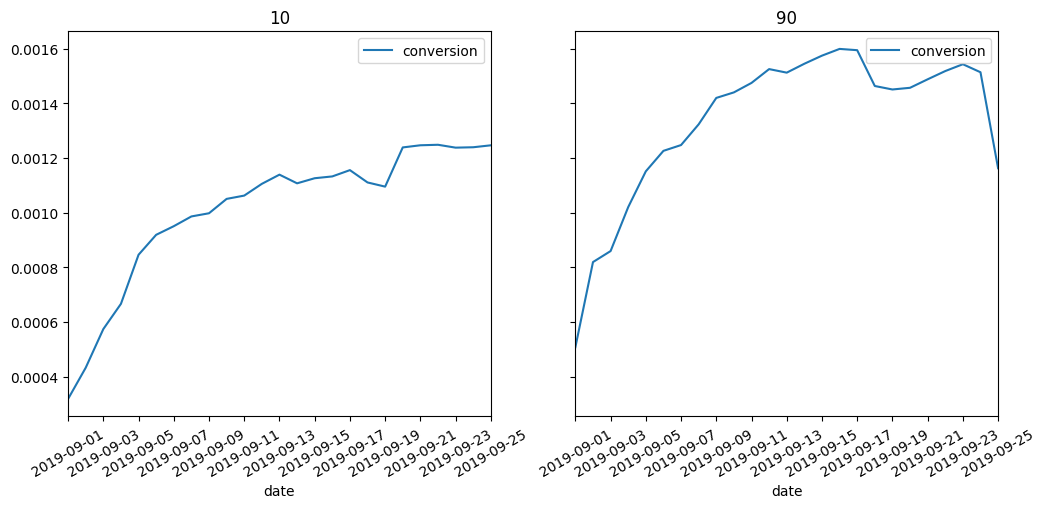

In [23]:
_, ax = plt.subplots(1, 2, figsize = (12,5), sharey=True)
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
ax = ax.flat
for i, (name, group) in enumerate(df_cum.groupby('Variant')[['conversion']]):
    group.reset_index(0, drop=True).plot(ax=ax[i])
    ax[i].xaxis.set_major_formatter(myFmt_major)
    ax[i].xaxis.set_minor_formatter(myFmt_minor)
    ax[i].xaxis.set_minor_locator(myLoc)
    ax[i].xaxis.set_major_locator(myLoc)
    ax[i].set(ylabel = None
       , title = name
       , label=None)
    ax[i].tick_params(axis="x", which="both", rotation=30)

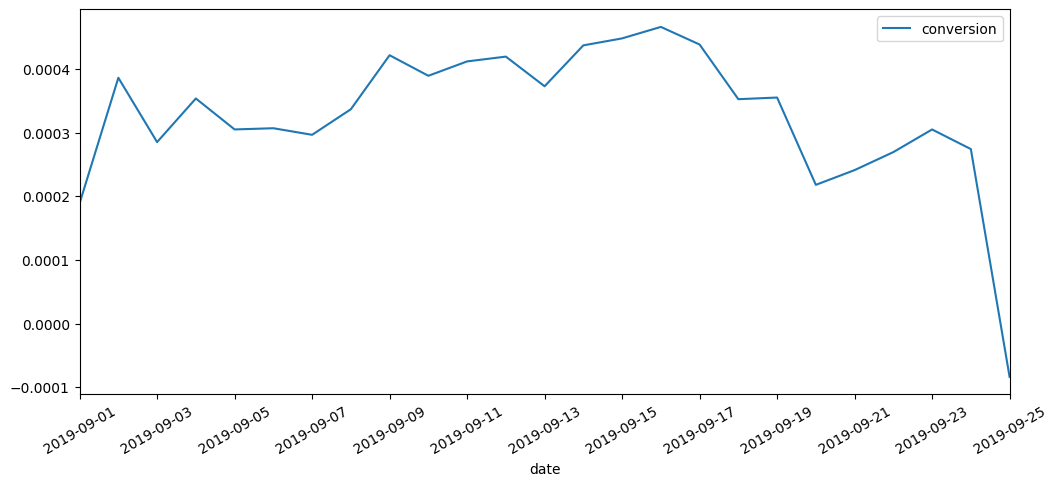

In [26]:
_, ax = plt.subplots(figsize = (12,5))
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
(df_cum.loc[90][['conversion']] - df_cum.loc[10][['conversion']]).plot(ax=ax)
ax.xaxis.set_major_formatter(myFmt_major)
ax.xaxis.set_minor_formatter(myFmt_minor)
ax.xaxis.set_minor_locator(myLoc)
ax.xaxis.set_major_locator(myLoc)
ax.set(ylabel = None
    , label=None)
ax.tick_params(axis="x", which="both", rotation=30)

In [27]:
df_cum.head()

cart  cart_items  conversion
Variant date                                    
90      2019-09-01    56      110247    0.000508
10      2019-09-01    52      163098    0.000319
        2019-09-02   111      256415    0.000433
90      2019-09-02   112      136704    0.000819
        2019-09-03   166      193122    0.000860

In [46]:
df_cum_pvalue = df_cum.groupby('date').agg({'cart': lambda x: list(x), 'cart_items': lambda x: list(x)})
df_cum_pvalue.head()

,cart,cart_items
date,,
2019-09-01,"[56, 52]","[110247, 163098]"
2019-09-02,"[111, 112]","[256415, 136704]"
2019-09-03,"[166, 157]","[193122, 273400]"
2019-09-04,"[203, 225]","[304552, 220501]"
2019-09-05,"[274, 285]","[238004, 336858]"


In [52]:
sapi.proportions_ztest(df_cum_pvalue.cart[-1], df_cum_pvalue.cart_items[-1])

(-1.6978187327803744, 0.08954197918465842)

In [48]:
def func(row):
    stats, pvalue = sapi.proportions_ztest(row.cart, row.cart_items)
    return pvalue
df_cum_pvalue['pvalue'] = df_cum_pvalue.apply(func, axis=1)
df_cum_pvalue.head()

,cart,cart_items,pvalue
date,,,
2019-09-01,"[56, 52]","[110247, 163098]",0.014656
2019-09-02,"[111, 112]","[256415, 136704]",0.000001
2019-09-03,"[166, 157]","[193122, 273400]",0.000263
2019-09-04,"[203, 225]","[304552, 220501]",0.000009
2019-09-05,"[274, 285]","[238004, 336858]",0.000255


In [55]:
df_cum_pvalue.tail()

,cart,cart_items,pvalue
date,,,
2019-09-21,"[1036, 951]","[831159, 639240]",7.891955e-05
2019-09-22,"[997, 1080]","[656842, 865177]",8.118978e-06
2019-09-23,"[1119, 1033]","[904040, 669516]",3.043307e-07
2019-09-24,"[1102, 1173]","[728097, 946554]",1.774779e-06
2019-09-25,"[1180, 1195]","[1015053, 958822]",8.954198e-02


In [53]:
df_cum_pvalue.iloc[-1]

cart               [1180, 1195]
cart_items    [1015053, 958822]
pvalue                 0.089542
Name: 2019-09-25 00:00:00, dtype: object

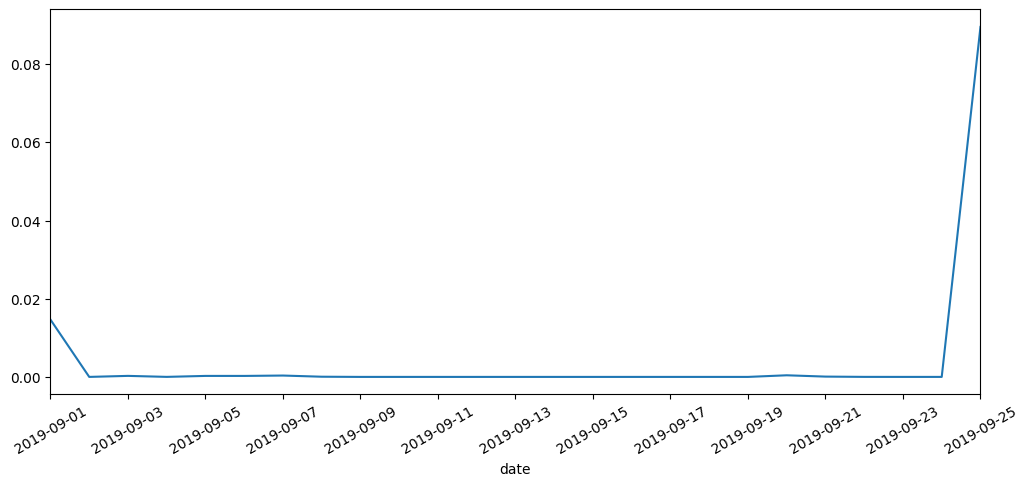

In [57]:
_, ax = plt.subplots(figsize = (12,5))
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
df_cum_pvalue.pvalue.plot(ax=ax)
ax.xaxis.set_major_formatter(myFmt_major)
ax.xaxis.set_minor_formatter(myFmt_minor)
ax.xaxis.set_minor_locator(myLoc)
ax.xaxis.set_major_locator(myLoc)
ax.set(ylabel = None
    , label=None)
ax.tick_params(axis="x", which="both", rotation=30)

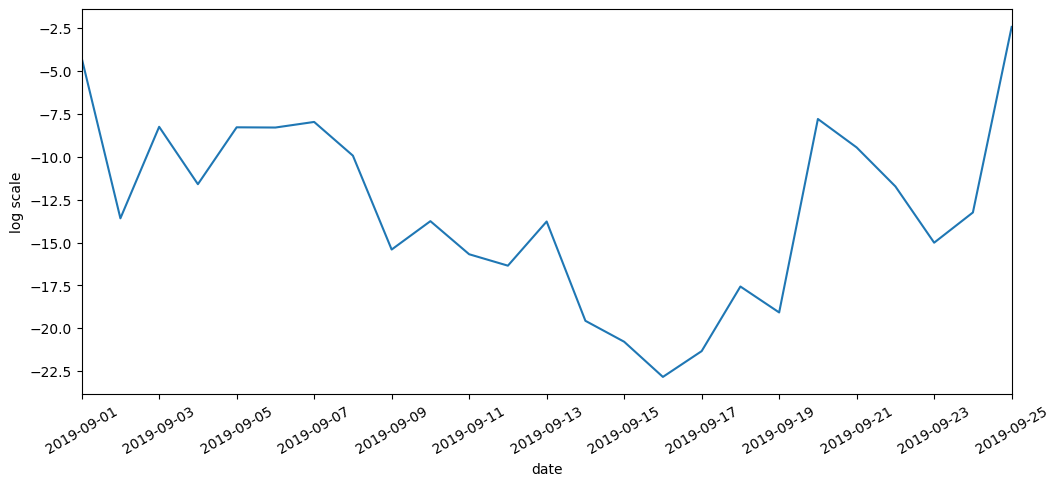

In [58]:
_, ax = plt.subplots(figsize = (12,5))
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
myFmt_minor = mdates.DateFormatter('%Y-%m-%d')
myLoc = mdates.DayLocator(interval=2)
np.log(df_cum_pvalue.pvalue).plot(ax=ax)
ax.xaxis.set_major_formatter(myFmt_major)
ax.xaxis.set_minor_formatter(myFmt_minor)
ax.xaxis.set_minor_locator(myLoc)
ax.xaxis.set_major_locator(myLoc)
ax.set(ylabel = 'log scale'
    , label=None)
ax.tick_params(axis="x", which="both", rotation=30)

In [31]:
df.head(1)

,date,Variant,cart,cart_items
0,2019-09-01,90,56,110247


In [35]:
df['conversion'] = df.cart / df.cart_items
df.set_index(['Variant', 'date'], inplace=True)
df.head(1)

,,cart,cart_items,conversion
Variant,date,,,
90,2019-09-01,56,110247,0.000508


In [60]:
df_cum.tail()

cart  cart_items  conversion
Variant date                                    
90      2019-09-23  1033      669516    0.001543
        2019-09-24  1102      728097    0.001514
10      2019-09-24  1173      946554    0.001239
90      2019-09-25  1180     1015053    0.001163
10      2019-09-25  1195      958822    0.001246

In [59]:
df.tail()

cart  cart_items  conversion
Variant date                                    
90      2019-09-23    36       12674    0.002840
        2019-09-24    69       58581    0.001178
10      2019-09-24    54       42514    0.001270
90      2019-09-25    78      286956    0.000272
10      2019-09-25    22       12268    0.001793

In [ ]:
df.loc[10].conversion

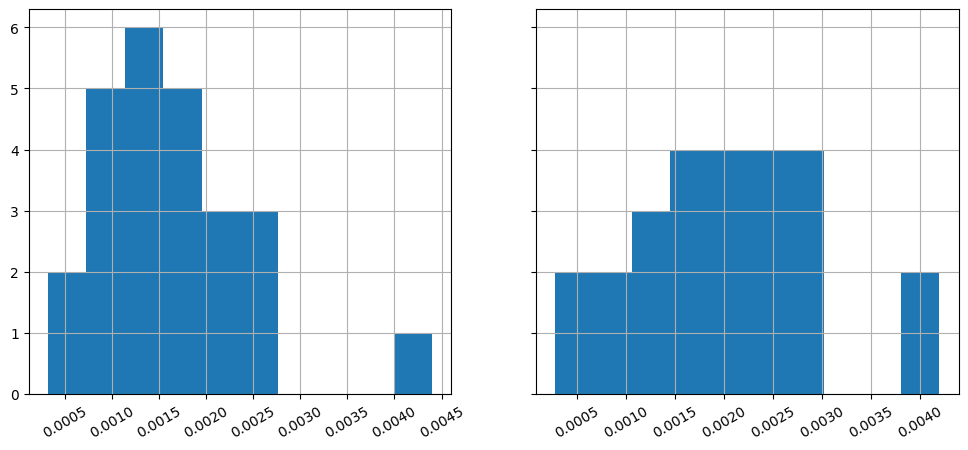

In [43]:
_, ax = plt.subplots(1, 2, figsize = (12,5), sharey=True)
ax = ax.flat
myFmt_major = mdates.DateFormatter('%Y-%m-%d')
df.loc[10].conversion.hist(ax=ax[0])
df.loc[90].conversion.hist(ax=ax[1])
ax[0].tick_params(axis="x", which="both", rotation=30)
ax[1].tick_params(axis="x", which="both", rotation=30)

In [61]:
df.head()

cart  cart_items  conversion
Variant date                                    
90      2019-09-01    56      110247    0.000508
10      2019-09-01    52      163098    0.000319
        2019-09-02    59       93317    0.000632
90      2019-09-02    56       26457    0.002117
        2019-09-03    54       56418    0.000957

In [62]:
df.cart.sum() / df.cart_items.sum()

0.0012032170223545057

In [63]:
df.conversion.mean()

0.0018268936142451092

,cart,cart_items,conversion
date,,,
2019-09-20,156,35456,0.004400
2019-09-21,24,14104,0.001702
2019-09-22,44,34018,0.001293
2019-09-23,39,38863,0.001004
2019-09-24,54,42514,0.001270


In [65]:
cart_10 = df.loc[10].cart
cart_90 = df.loc[90].cart
cart_items_10 = df.loc[10].cart_items
cart_items_90 = df.loc[90].cart_items

In [ ]:
[ 43  48  32 ...  48  56  82]

ConfidenceInterval(low=-0.0010955885703580709, high=0.000687034669453349)


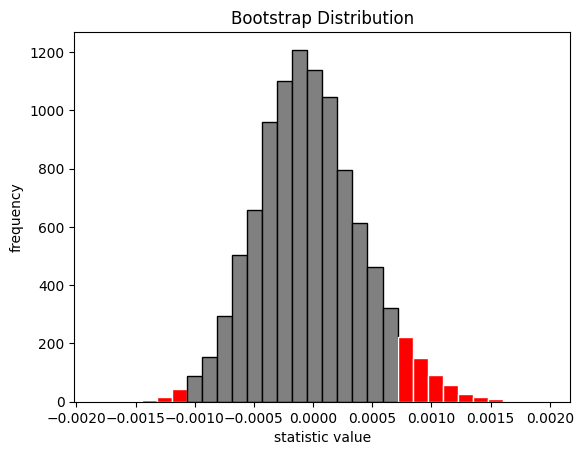

In [81]:
def my_statistic(sam1, sam2, sam3, sam4,  axis=-1):
    conv_10 = np.sum(sam1, axis=-1) / np.sum(sam2, axis=-1)
    conv_90 = np.sum(sam3, axis=-1) / np.sum(sam4, axis=-1)
    return conv_90 - conv_10
data = (cart_10.to_numpy(), cart_items_10.to_numpy(), cart_90.to_numpy(), cart_items_90.to_numpy())
res = st.bootstrap(data, my_statistic, method='basic', random_state=1)
print(res.confidence_interval)
fig, ax = plt.subplots()
_, _, bars = ax.hist(res.bootstrap_distribution, bins=30, ec='w')
for bar in bars:
    if bar.get_x() < res.confidence_interval[0] or bar.get_x() > res.confidence_interval[1]:
        bar.set_facecolor('red')
    else:
        bar.set_facecolor('grey')
        bar.set_edgecolor('black')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

Посмотрим без последнего дня

In [89]:
df.loc[10].iloc[:-1].tail()

,cart,cart_items,conversion
date,,,
2019-09-20,156,35456,0.004400
2019-09-21,24,14104,0.001702
2019-09-22,44,34018,0.001293
2019-09-23,39,38863,0.001004
2019-09-24,54,42514,0.001270


In [91]:
cart_10 = df.loc[10].iloc[:-1].cart
cart_90 = df.loc[90].iloc[:-1].cart
cart_items_10 = df.loc[10].iloc[:-1].cart_items
cart_items_90 = df.loc[90].iloc[:-1].cart_items

ConfidenceInterval(low=-0.0005311809566246593, high=0.0010263650022256227)


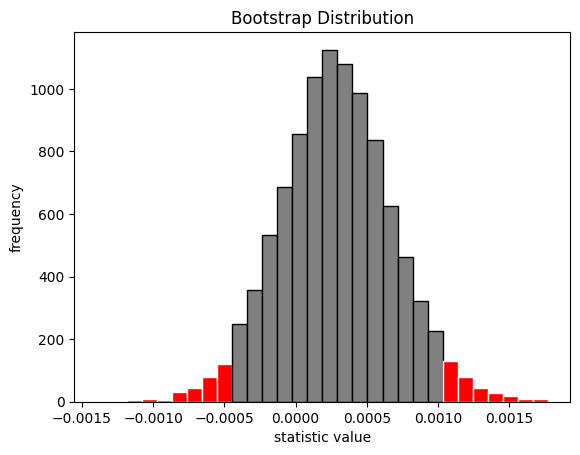

In [92]:
def my_statistic(sam1, sam2, sam3, sam4,  axis=-1):
    conv_10 = np.sum(sam1, axis=-1) / np.sum(sam2, axis=-1)
    conv_90 = np.sum(sam3, axis=-1) / np.sum(sam4, axis=-1)
    return conv_90 - conv_10
data = (cart_10.to_numpy(), cart_items_10.to_numpy(), cart_90.to_numpy(), cart_items_90.to_numpy())
res = st.bootstrap(data, my_statistic, method='basic', random_state=1)
print(res.confidence_interval)
fig, ax = plt.subplots()
_, _, bars = ax.hist(res.bootstrap_distribution, bins=30, ec='w')
for bar in bars:
    if bar.get_x() < res.confidence_interval[0] or bar.get_x() > res.confidence_interval[1]:
        bar.set_facecolor('red')
    else:
        bar.set_facecolor('grey')
        bar.set_edgecolor('black')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

ConfidenceInterval(low=0.0006207070704664635, high=0.0016279989473295725)


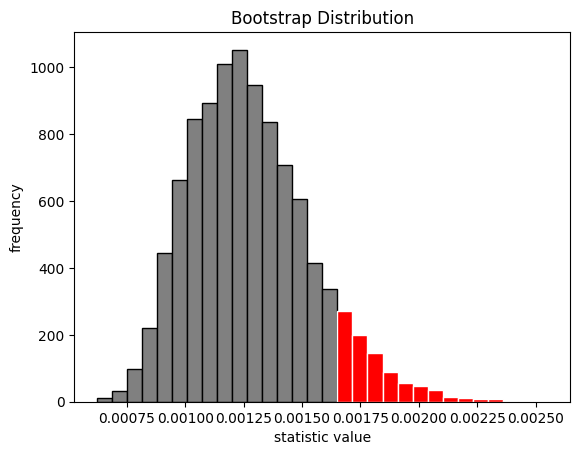

In [94]:
def my_statistic(sam1, sam2, axis=-1):
    conv_10 = np.sum(sam1, axis=-1) / np.sum(sam2, axis=-1)
    return conv_10
data = (cart_10.to_numpy(), cart_items_10.to_numpy())
res_10 = st.bootstrap(data, my_statistic, method='basic', random_state=1)
print(res_10.confidence_interval)
fig, ax = plt.subplots()
_, _, bars = ax.hist(res_10.bootstrap_distribution, bins=30, ec='w')
for bar in bars:
    if bar.get_x() < res_10.confidence_interval[0] or bar.get_x() > res_10.confidence_interval[1]:
        bar.set_facecolor('red')
    else:
        bar.set_facecolor('grey')
        bar.set_edgecolor('black')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

ConfidenceInterval(low=0.0007876360902563497, high=0.0019615350712712367)


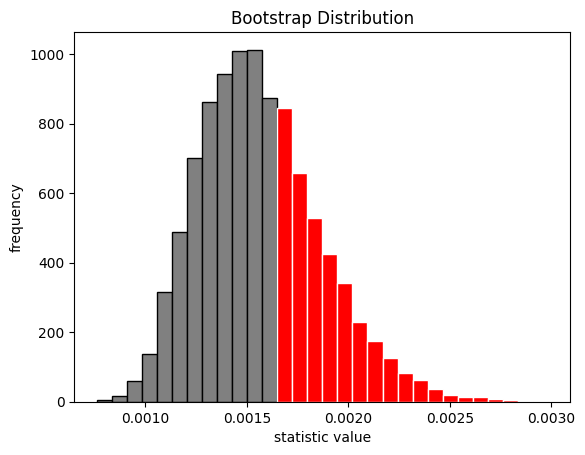

In [95]:
def my_statistic(sam1, sam2, axis=-1):
    conv_90 = np.sum(sam1, axis=-1) / np.sum(sam2, axis=-1)
    return conv_90
data = (cart_90.to_numpy(), cart_items_90.to_numpy())
res_90 = st.bootstrap(data, my_statistic, method='basic', random_state=1)
print(res_90.confidence_interval)
fig, ax = plt.subplots()
_, _, bars = ax.hist(res_90.bootstrap_distribution, bins=30, ec='w')
for bar in bars:
    if bar.get_x() < res.confidence_interval[0] or bar.get_x() > res.confidence_interval[1]:
        bar.set_facecolor('red')
    else:
        bar.set_facecolor('grey')
        bar.set_edgecolor('black')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

<Axes: ylabel='Count'>

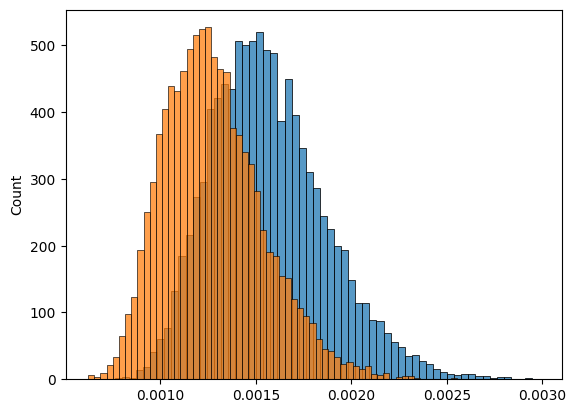

In [96]:
ax = sns.histplot(res_90.bootstrap_distribution)
sns.histplot(res_10.bootstrap_distribution, ax=ax)